# Assignment 7

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform statistical analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the questions step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
    - Well-documented code and clear comments.
    - Markdown explanations for each step.
    - Screenshots of the plots and outputs.


**Part I: Randomized Sales Data Generation (NumPy)**  
1. **Initialize Random Seed**  
2. **Generate Sales Data**  
   - Create a NumPy array of random sales data for 12 months (shape = (12, 4)), where each column represents a product category:  
     - Electronics, Clothing, Home & Kitchen, Sports.  
   - Sales values should be between 1000 and 5000 units per month.  
   - The range should be randomized using the seed.  
3. **Convert to DataFrame**  
   - Convert the cleaned NumPy array into a Pandas DataFrame with:  
     i. Columns: Electronics, Clothing, Home & Kitchen, Sports  
     ii. Index: Months from Jan to Dec  

In [2]:
import numpy as np
import pandas as pd

# 1
np.random.seed(102316043)

# 2
random_sales_data = np.random.rand(12, 4)
sales_data = 1000 + random_sales_data * 4000
sales_data = np.round(sales_data).astype(int)

# 3
col_names = ['Electronics', 'Clothing', 'Home_&_Kitchem', 'Sports']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_df = pd.DataFrame(sales_data, columns=col_names, index=months)

print(sales_df)


     Electronics  Clothing  Home_&_Kitchem  Sports
Jan         2071      1896            1122    1561
Feb         1478      3929            3224    3997
Mar         4318      2436            1749    3934
Apr         4384      2338            3890    3835
May         4614      2029            1783    4412
Jun         4622      2745            3676    1902
Jul         1583      4895            3418    2664
Aug         4167      2999            4990    3875
Sep         4761      4698            4340    3770
Oct         4056      4131            3974    4225
Nov         1402      1007            1290    2242
Dec         1291      3641            1635    4926


**Part II: Data Manipulation and Analysis (Pandas)**  
1. Display the first 5 rows and summary statistics of the DataFrame.  
2. Calculate the total sales per category and total sales per month.  
3. Calculate the average sales growth between consecutive months for each category.  
4. Add the following columns to the DataFrame:  
   - **Total Sales**: Sum of all categories per month.  
   - **Growth Rate**: Percentage change in Total Sales from the previous month.  
5. Apply a randomized discount:  
   - If your roll number is even, apply a **10% discount** to the **Electronics** category.  
   - If odd, apply a **15% discount** to the **Clothing** category.  


In [38]:
# 1
print("1.\n", sales_df.head())
print("\nSummary Statistics:")
print(sales_df.describe())

# 2
tot_sales_cat = sales_df.sum(axis=0)
tot_sales_month = sales_df.sum(axis=1)
print(f"\n2.\nTotal sales per category: \n{tot_sales_cat}\n\nTotal sales per Month: \n{tot_sales_month}\n")

# 3
monthly_sales_delta = sales_df.diff()
average_growth = monthly_sales_delta.mean()
print("\n3.\nAverage sales growth between consecutive months for each category:")
print(average_growth)

# 4
sales_df['Total_Sales'] = tot_sales_month
# Initialize the first month's growth rate as 0
sales_df['Growth_Rate'] = 0

# Calculate growth rate for subsequent months
for i in range(1, len(months)):
    current_month = months[i]
    previous_month = months[i-1]
    
    current_sales = sales_df.loc[current_month, 'Total_Sales']
    previous_sales = sales_df.loc[previous_month, 'Total_Sales']
    
    growth_rate = (current_sales - previous_sales) / previous_sales * 100
    sales_df.loc[current_month, 'Growth_Rate'] = growth_rate

print("\n4.\nDataFrame with Total Sales and Growth Rate:")
print(sales_df)

# 5
# Apply 15% discount to Clothing since I have an odd roll number
print("\n5.\nApplying 15% discount to Clothing (odd roll number)")
sales_df['Clothing_Discounted'] = sales_df['Clothing'] * 0.85

print("\nFinal DataFrame with discounts applied:")
print(sales_df)

1.
      Electronics  Clothing  Home_&_Kitchem  Sports   Total_Sales  Growth_Rate  \
Jan         2071      1896            1122    1561       43123.2     0.000000   
Feb         1478      3929            3224    3997  82628.148522    91.609501   
Mar         4318      2436            1749    3934  78758.209235    -4.683560   
Apr         4384      2338            3890    3835  90688.300347    15.147743   
May         4614      2029            1783    4412  80454.935475   -11.284107   

     Clothing_Discounted  
Jan              1611.60  
Feb              3339.65  
Mar              2070.60  
Apr              1987.30  
May              1724.65  

Summary Statistics:
       Electronics     Clothing  Home_&_Kitchem       Sports  Growth_Rate  \
count    12.000000    12.000000        12.00000    12.000000    12.000000   
mean   3228.916667  3062.000000      2924.25000  3445.250000    13.196633   
std    1492.388900  1203.640538      1330.40644  1074.953456    44.707362   
min    1291.000000

C:\Users\Ishtpreet\AppData\Local\Temp\ipykernel_6660\2532888077.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '92.05564295929442' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales_df.loc[current_month, 'Growth_Rate'] = growth_rate


**Part III: Visualizations (Matplotlib and Seaborn)**  
1. Plot monthly sales trends for each category using line plots.  
2. Create the following plots:  
   - **Box plots** to show the sales distribution for each category.  


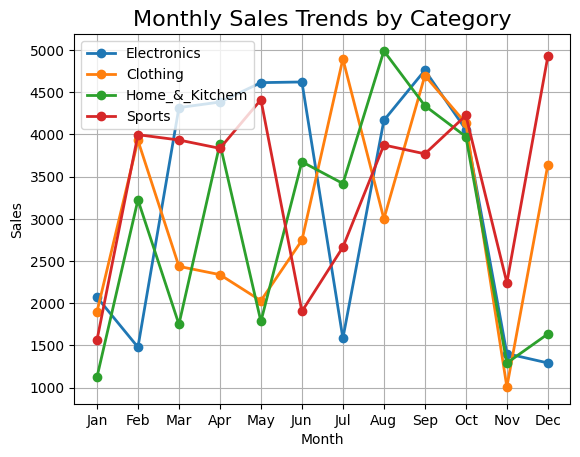

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


for category in sales_df.columns[:4]:  # Excluding Total_Sales, Growth_Rate
    plt.plot(sales_df.index, sales_df[category], marker='o', linewidth=2, label=category)

plt.title('Monthly Sales Trends by Category', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

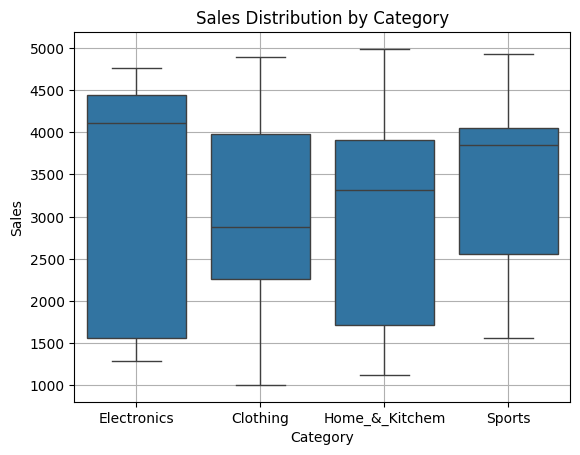

In [48]:
sales_data = sales_df.iloc[:, :4].melt(var_name='Category', value_name='Sales')
sns.boxplot(x='Category', y='Sales', data=sales_data)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

**Q.2 For the array: `array = np.array([[1, -2, 3], [-4, 5, -6]])`**  
i. Find element-wise absolute value.  
ii. Find the 25th, 50th, and 75th percentile of the flattened array, for each column, for each row.  
iii. Mean, Median, and Standard Deviation of the flattened array, of each column, and each row.  

In [7]:
array = np.array([[1, -2, 3], [-4, 5, -6]])

abs_array = np.abs(array)
print(f"i. Element-wise absolute value: {abs_array}\n")

flat_array = array.flatten()
print(f"ii.\nFlattened array percentiles (25th, 50th, 75th):")

print("\nPercentiles for each column:")
for i, col in enumerate(array.T):
    print(f"Column {i}: {np.percentile(col, [25, 50, 75])}")

print("\nPercentiles for each row:")
for i, row in enumerate(array):
    print(f"Row {i}: {np.percentile(row, [25, 50, 75])}")

# iii. Mean, Median, and Standard Deviation
# For flattened array
print("\niii. Statistical measures:")
print(f"Mean: {np.mean(flat_array)}")
print(f"Median: {np.median(flat_array)}")
print(f"Standard Deviation: {np.std(flat_array)}")

# For each column
print("\nFor each column:")
print(f"Mean: {np.mean(array, axis=0)}")
print(f"Median: {np.median(array, axis=0)}")
print(f"Standard Deviation: {np.std(array, axis=0)}")

# For each row
print("\nFor each row:")
print(f"Mean: {np.mean(array, axis=1)}")
print(f"Median: {np.median(array, axis=1)}")
print(f"Standard Deviation: {np.std(array, axis=1)}")

i. Element-wise absolute value: [[1 2 3]
 [4 5 6]]

ii.
Flattened array percentiles (25th, 50th, 75th):

Percentiles for each column:
Column 0: [-2.75 -1.5  -0.25]
Column 1: [-0.25  1.5   3.25]
Column 2: [-3.75 -1.5   0.75]

Percentiles for each row:
Row 0: [-0.5  1.   2. ]
Row 1: [-5.  -4.   0.5]

iii. Statistical measures:
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224

For each column:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]

For each row:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]



**Q.3 For the array: `a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])`.**  
i. Find floor, ceiling, and truncated value, rounded values.  


**Q.4** Write a program to swap two elements in a list in Python using a temporary variable.  



**Q.5** Write a Python program to swap two elements in a set by converting it to a list first.  
